# NEMA RECOHITS

- Builds the recohits function for the NEMA analysis 

In [1]:
import Pkg

In [482]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase"]);

In [504]:
Pkg.add.(["Test"]);

In [48]:
Pkg.add.(["VegaLite","VegaDatasets"]);

In [129]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [1]:
using LsqFit
using GLM

In [2]:
using HTTP
using Plots
using VegaLite
using VegaDatasets
using DataFrames
using HDF5
using DrWatson
using Test

In [3]:
using Glob
using CSV

In [4]:
using Statistics
using StatsBase
using Printf

In [5]:
@quickactivate "JPetalo"

In [6]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [7]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [8]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [420]:
include(srcdir("jpetalo.jl"))

Main.JPetalo

## Read a file with petalo interactions

In [10]:
path = datadir("nema3-vac-1m/nema3-vac-1m-0.h5")

"/Users/jj/JuliaProjects/JPetalo/data/nema3-vac-1m/nema3-vac-1m-0.h5"

In [11]:
fid = h5open(path, "r") 

🗂️ HDF5.File: (read-only) /Users/jj/JuliaProjects/JPetalo/data/nema3-vac-1m/nema3-vac-1m-0.h5
└─ 📂 MC
   ├─ 🔢 configuration
   ├─ 🔢 hits
   ├─ 🔢 primaries
   ├─ 🔢 process_names
   ├─ 🔢 sensor_xyz
   ├─ 🔢 total_charge
   ├─ 🔢 vertices
   ├─ 🔢 volume_names
   └─ 🔢 waveform

In [12]:
pdf = JPetalo.read_abc(path);

In [13]:
pdf.waveform

,event_id,sensor_id,time
,Int64,Int64,Float32
1,0,8,271.643
2,0,10,27.0399
3,0,37,63.5379
4,0,39,49.9229
5,0,41,37.0302
6,0,50,81.3851
7,0,57,54.0728
8,0,57,85.1762
9,0,66,34.9161


In [16]:
dfs = JPetalo.primary_in_lxe(pdf.vertices)       # primary photons in LXe

,event_id,track_id,parent_id,x,y,z,t,moved
,Int64,Int64,Int64,Float32,Float32,Float32,Float32,Float32
1,0,2,0,-329.725,-138.272,159.639,1.37147,1.60207
2,0,2,0,-341.491,-146.734,161.665,1.42028,14.6337
3,0,2,0,-328.042,-151.718,150.513,1.48088,18.1678
4,0,1,0,260.333,288.127,52.9122,1.08284,33.4672
5,0,1,0,263.184,286.08,57.9332,1.10327,6.12604
6,1,2,0,-90.0749,357.611,126.612,1.27008,13.5522
7,1,2,0,-91.1156,361.526,127.991,1.28435,4.27901
8,2,2,0,-55.5019,-364.304,-334.974,1.68571,16.705
9,2,2,0,-54.6188,-389.156,-349.452,1.78169,28.7752


In [112]:
event=0
ecut = 2.0
pde =0.3

0.3

In [421]:
wfm = JPetalo.select_by_column_value(pdf.waveform, "event_id", event)
wfm[!, "q"] = Float32.(ones(nrow(wfm)))
wfm[!, "prob"] = rand(Float32, nrow(wfm))
println("size of wfm =", size(wfm))
first(wfm, 5)

size of wfm =(12727, 5)


,event_id,sensor_id,time,q,prob
,Int64,Int64,Float32,Float32,Float32
1,0,8,271.643,1.0,0.752864
2,0,10,27.0399,1.0,0.414818
3,0,37,63.5379,1.0,0.299595
4,0,39,49.9229,1.0,0.614832
5,0,41,37.0302,1.0,0.206923


In [422]:
wfmc = JPetalo.select_by_column_value_lt(wfm, "prob", pde)
#wfmc = wfm
println("size of wfmc =", size(wfmc))
first(wfmc, 5)

size of wfmc =(3759, 5)


,event_id,sensor_id,time,q,prob
,Int64,Int64,Float32,Float32,Float32
1,0,37,63.5379,1.0,0.299595
2,0,41,37.0302,1.0,0.206923
3,0,50,81.3851,1.0,0.0463804
4,0,77,17.8952,1.0,0.128077
5,0,105,50.8966,1.0,0.257984


In [361]:
d = Normal(0.0, 0.085)

Normal{Float64}(μ=0.0, σ=0.085)

In [423]:
wfmc[!,"dt"] = Float32.(rand(d, nrow(wfmc)))
println("size of wfmc =", size(wfmc))
first(wfmc, 5)

size of wfmc =(3759, 6)


,event_id,sensor_id,time,q,prob,dt
,Int64,Int64,Float32,Float32,Float32,Float32
1,0,37,63.5379,1.0,0.299595,0.143154
2,0,41,37.0302,1.0,0.206923,-0.00107546
3,0,50,81.3851,1.0,0.0463804,-0.0791531
4,0,77,17.8952,1.0,0.128077,0.0733308
5,0,105,50.8966,1.0,0.257984,0.125551


In [424]:
wfmt = transform(wfmc, [:time, :dt] => (+) => :mtime)
println("size of wfmt =", size(wfmt))
first(wfmt, 5)

size of wfmt =(3759, 7)


,event_id,sensor_id,time,q,prob,dt,mtime
,Int64,Int64,Float32,Float32,Float32,Float32,Float32
1,0,37,63.5379,1.0,0.299595,0.143154,63.6811
2,0,41,37.0302,1.0,0.206923,-0.00107546,37.0291
3,0,50,81.3851,1.0,0.0463804,-0.0791531,81.306
4,0,77,17.8952,1.0,0.128077,0.0733308,17.9685
5,0,105,50.8966,1.0,0.257984,0.125551,51.0222


In [425]:
wtm1 = combine(groupby(wfmt, :sensor_id), :time => minimum)
println("size of wtm1 =", size(wtm1))
first(wtm1, 5)

size of wtm1 =(2534, 2)


,sensor_id,time_minimum
,Int64,Float32
1,37,63.5379
2,41,37.0302
3,50,81.3851
4,77,17.8952
5,105,50.8966


In [426]:
wtmm1 = combine(groupby(wfmt, :sensor_id), :mtime => minimum)
println("size of wtmm1 =", size(wtmm1))
first(wtmm1, 5)

size of wtmm1 =(2534, 2)


,sensor_id,mtime_minimum
,Int64,Float32
1,37,63.6811
2,41,37.0291
3,50,81.306
4,77,17.9685
5,105,51.0222


In [427]:
wtm2 = combine(groupby(wfmt, :sensor_id), :time => mean)
println("size of wtm1 =", size(wtm2))
first(wtm2, 5)

size of wtm1 =(2534, 2)


,sensor_id,time_mean
,Int64,Float32
1,37,63.5379
2,41,37.0302
3,50,81.3851
4,77,17.8952
5,105,50.8966


In [428]:
wtmm2 = combine(groupby(wfmt, :sensor_id), :mtime => mean)
println("size of wtmm2 =", size(wtmm2))
first(wtmm2, 5)

size of wtmm2 =(2534, 2)


,sensor_id,mtime_mean
,Int64,Float32
1,37,63.6811
2,41,37.0291
3,50,81.306
4,77,17.9685
5,105,51.0222


In [444]:
wtmq = combine(groupby(wfmt, :sensor_id), :q => sum)
println("size of wtm1 =", size(wtmq))
first(wtmq, 5)

size of wtm1 =(2534, 2)


,sensor_id,q_sum
,Int64,Float32
1,37,1.0
2,41,1.0
3,50,1.0
4,77,1.0
5,105,1.0


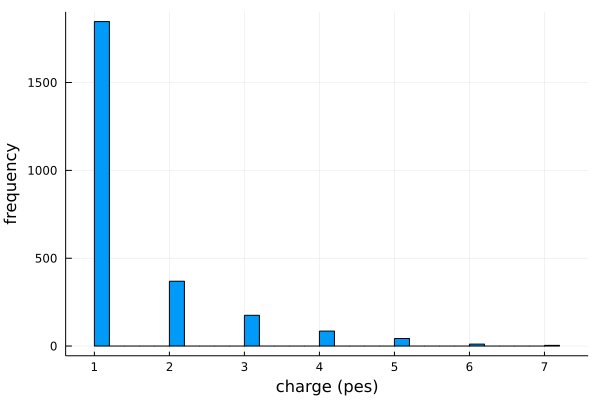

In [445]:
hqsum = JPetalo.hist1d(wtmq.q_sum, 50, 0., 10.);
plot(hqsum, xlabel= "charge (pes)", ylabel="frequency", legend=false)

In [446]:
qdf = JPetalo.select_by_column_value(pdf.total_charge, "event_id", event)
println("size of qdf =", size(qdf))
first(qdf, 5)

size of qdf =(5762, 3)


,event_id,sensor_id,charge
,Int64,Int64,Int64
1,0,8,1
2,0,10,1
3,0,37,1
4,0,39,1
5,0,41,1


In [447]:
qdfge10 = JPetalo.select_by_column_value_ge(qdf, "charge", 10)
println("size of dataframe =", size(qdfge10))
first(qdfge10, 5)

size of dataframe =(326, 3)


,event_id,sensor_id,charge
,Int64,Int64,Int64
1,0,14577,12
2,0,14721,11
3,0,14860,11
4,0,14861,10
5,0,14862,12


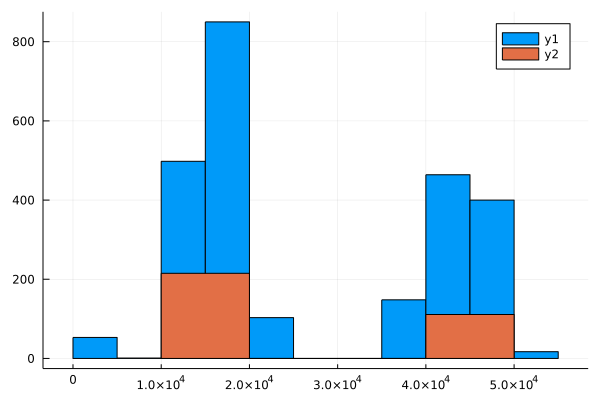

In [448]:
h1 = histogram(wtmq.sensor_id)
h2 = histogram!(h1, qdfge10.sensor_id)

In [449]:
j=1
for i in 1:nrow(wtmq)
    if wtmq[i, "sensor_id"] ∈ qdfge10.sensor_id
        nomatch=true
        while nomatch && j <= nrow(qdfge10)
            if wtmq[i, "sensor_id"] == qdfge10[j, "sensor_id"]
                #println("wtmq sensor_id = ", wtmq[i, "sensor_id"], " qtmq q = ", wtmq[i, "q_sum"])
                #println("qdfge10 sensor_id = ", qdfge10[j, "sensor_id"], " qdfge10 q = ", qdfge10[j, "charge"])
                println("i =", i, " wtmq =", wtmq[i, "q_sum"])
                wtmq[i, "q_sum"] = qdfge10[j, "charge"] * pde
                println("i =", i, " wtmq (after corr) =", wtmq[i, "q_sum"])
                j+=1
                nomatch=false
            else
                j+=2
            end
        end     
    end
end
    

i =473 wtmq =1.0
i =473 wtmq (after corr) =3.6
i =503 wtmq =2.0
i =503 wtmq (after corr) =3.3
i =529 wtmq =5.0
i =529 wtmq (after corr) =3.3
i =530 wtmq =3.0
i =530 wtmq (after corr) =3.0
i =531 wtmq =3.0
i =531 wtmq (after corr) =3.6
i =532 wtmq =3.0
i =532 wtmq (after corr) =3.6
i =548 wtmq =3.0
i =548 wtmq (after corr) =3.3
i =550 wtmq =3.0
i =550 wtmq (after corr) =3.3
i =551 wtmq =1.0
i =551 wtmq (after corr) =3.0
i =553 wtmq =1.0
i =553 wtmq (after corr) =4.8
i =554 wtmq =4.0
i =554 wtmq (after corr) =3.6
i =555 wtmq =2.0
i =555 wtmq (after corr) =6.6
i =557 wtmq =5.0
i =557 wtmq (after corr) =4.8


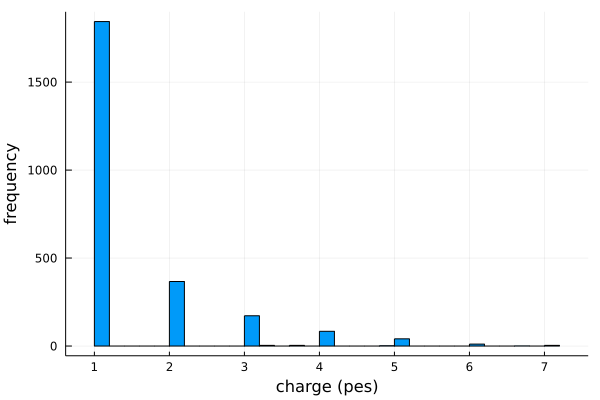

In [450]:
hqsum = JPetalo.hist1d(wtmq.q_sum, 50, 0., 50.);
plot(hqsum, xlabel= "charge (pes)", ylabel="frequency", legend=false)

In [451]:
wfmx  = DataFrame(sensor_id=wtmq.sensor_id, 
                  ttmin=wtm1.time_minimum, 
                  ttmean=wtm2.time_mean, 
                  tmin=wtmm1.mtime_minimum,
                  tmean=wtmm2.mtime_mean,
                  q=wtmq.q_sum)

println("size of wfmx =", size(wfmx))
first(wfmx, 5)

size of wfmx =(2534, 6)


,sensor_id,ttmin,ttmean,tmin,tmean,q
,Int64,Float32,Float32,Float32,Float32,Float32
1,37,63.5379,63.5379,63.6811,63.6811,1.0
2,41,37.0302,37.0302,37.0291,37.0291,1.0
3,50,81.3851,81.3851,81.306,81.306,1.0
4,77,17.8952,17.8952,17.9685,17.9685,1.0
5,105,50.8966,50.8966,51.0222,51.0222,1.0


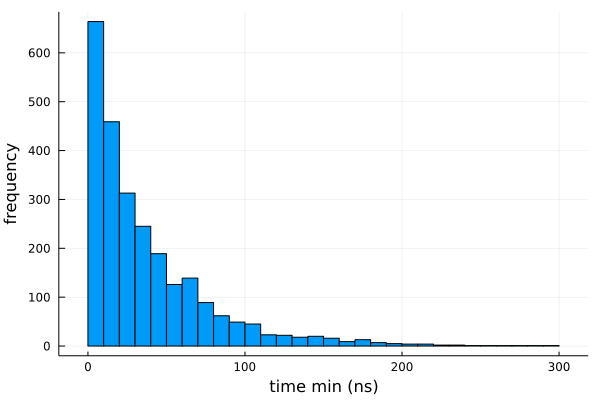

In [454]:
hq = JPetalo.hist1d(wfmx.ttmin, 50, 0., 300.)
plot(hq, legend=false, xlabel="time min (ns)", ylabel="frequency")

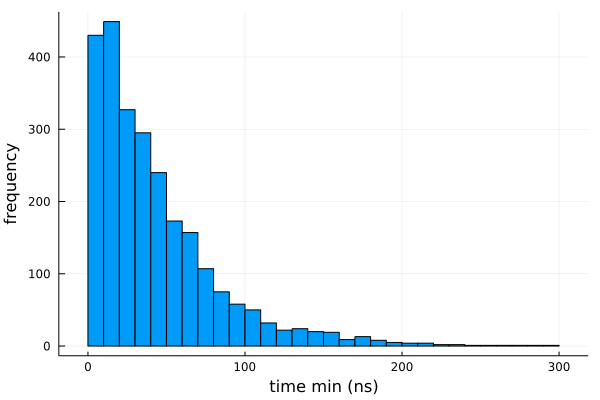

In [457]:
hq = JPetalo.hist1d(wfmx.ttmean, 50, 0., 300.)
plot(hq, legend=false, xlabel="time min (ns)", ylabel="frequency")

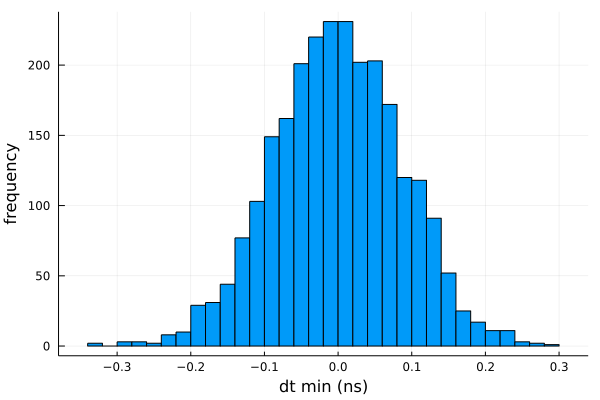

In [458]:
hq = JPetalo.hist1d(wfmx.ttmin - wfmx.tmin, 50, -100., 100.)
plot(hq, legend=false)
xlabel!("dt min (ns)")
ylabel!("frequency")

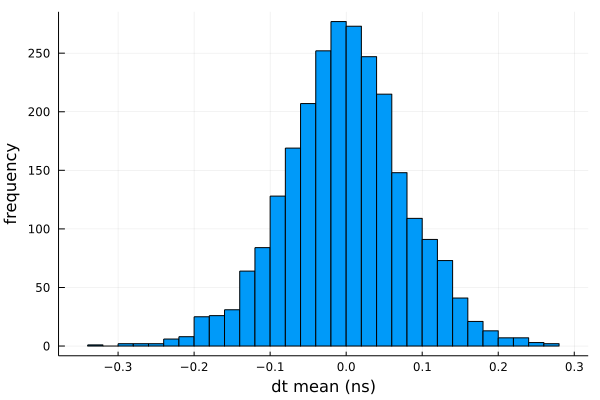

In [459]:
hq = JPetalo.hist1d(wfmx.ttmean - wfmx.tmean, 50, -100., 100.)
plot(hq, legend=false)
xlabel!("dt mean (ns)")
ylabel!("frequency")

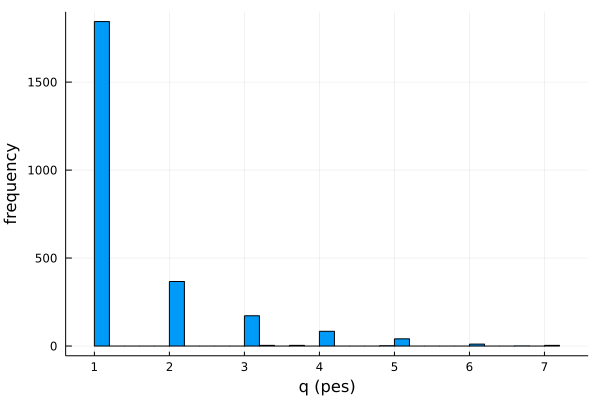

In [460]:
hq =JPetalo.hist1d(wfmx.q, 50, 0., 50.);
plot(hq, legend=false)
xlabel!("q (pes)")
ylabel!("frequency")

In [461]:
wfmqt   = wfmx[wfmx.q .>ecut,:]
println("size of wfmqt =", size(wfmqt))
first(wfmqt, 5)

size of wfmqt =(323, 6)


,sensor_id,ttmin,ttmean,tmin,tmean,q
,Int64,Float32,Float32,Float32,Float32,Float32
1,512,4.84965,23.887,4.87163,23.9351,3.0
2,12452,20.9269,25.9668,20.9218,26.0269,3.0
3,13872,16.4564,24.3915,16.411,24.452,3.0
4,14157,4.9606,15.7455,4.91524,15.7122,3.0
5,14299,13.8141,35.7293,13.8764,35.758,4.0


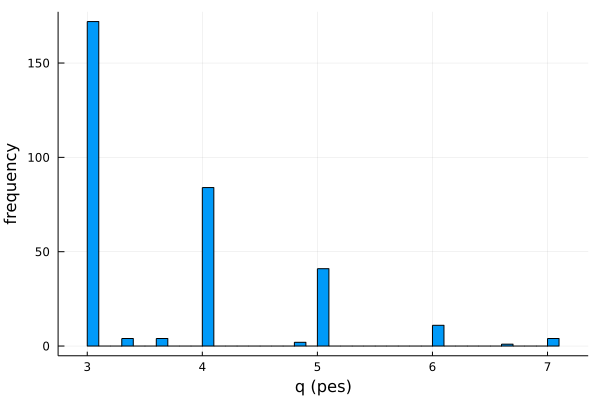

In [462]:
hq =JPetalo.hist1d(wfmqt.q, 50, 0., 50.);
plot(hq, legend=false)
xlabel!("q (pes)")
ylabel!("frequency")

In [463]:
#select the id's of the sipms with charge above threshold
sids = wfmqt[!,:sensor_id]

#compute positions of the SiPMs
pos   = JPetalo.sipm_pos.((pdf.sensor_xyz,),sids)
x = [p[1] for p in pos]
y = [p[2] for p in pos]
z = [p[3] for p in pos]

# return hit data frame
xyzqtdf = DataFrame(x=x,y=y,z=z,
                    ttmin=wfmqt.ttmin, 
                    ttmean=wfmqt.ttmean, 
                    tmin=wfmqt.tmin,
                    tmean=wfmqt.tmean,
                    q=wfmqt.q) 
println("size of xyzqtdf =", size(xyzqtdf))
first(xyzqtdf, 5)

size of xyzqtdf =(323, 8)


,x,y,z,ttmin,ttmean,tmin,tmean,q
,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32
1,-21.044,394.84,108.5,4.84965,23.887,4.87163,23.9351,3.0
2,-395.26,10.5258,192.5,20.9269,25.9668,20.9218,26.0269,3.0
3,-390.909,-59.427,192.5,16.4564,24.3915,16.411,24.452,3.0
4,-388.553,-73.2632,199.5,4.9606,15.7455,4.91524,15.7122,3.0
5,-387.192,-80.1477,199.5,13.8141,35.7293,13.8764,35.758,4.0


In [526]:
using Logging

In [539]:
logger = SimpleLogger(stdout, Logging.Debug)

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(42) open, 0 bytes waiting))), Debug, Dict{Any, Int64}())

In [540]:
@debug "hi"

In [538]:
@info "hi"

┌ Info: hi
└ @ Main In[538]:1


In [542]:
old_logger = global_logger(logger) 

Base.CoreLogging.SimpleLogger(IJulia.IJuliaStdio{Base.PipeEndpoint}(IOContext(Base.PipeEndpoint(RawFD(44) open, 0 bytes waiting))), Info, Dict{Any, Int64}())

In [543]:
@debug "hi"

┌ Debug: hi
└ @ Main In[543]:1


In [532]:
Logging.LogLevel = Logging.Debug

LoadError: cannot assign variables in other modules

In [511]:
function reco_hits(event::Integer, 
                   total_charge::DataFrame,
                   sensor_xyz::DataFrame, 
                   waveform::DataFrame, 
                   ecut::Number=2.0, 
                   pde::Number=0.3,  
                   sigma_tof::Number=0.085, 
                   verbose::Bool=true)
    
    max_pes =10

    function sync!(wfm, qdf)
        j=1
        for i in 1:nrow(wfm)
            if wfm[i, "sensor_id"] ∈ qdf.sensor_id
                nomatch=true
                while nomatch && j <= nrow(qdf)
                    if wfm[i, "sensor_id"] == qdf[j, "sensor_id"]
                        #println("wtmq sensor_id = ", wtmq[i, "sensor_id"], " qtmq q = ", wtmq[i, "q_sum"])
                        #println("qdfge10 sensor_id = ", qdfge10[j, "sensor_id"], " qdfge10 q = ", qdfge10[j, "charge"])
                        wfm[i, "q_sum"] = qdf[j, "charge"] * pde 
                        j+=1
                        nomatch=false
                    else
                        j+=2
                    end
                end     
            end
        end
    end
    

    # select the waveform of this event
    wfm = JPetalo.select_by_column_value(waveform, "event_id", event)
    
    # add a column with probability of surviving pdf cut (pass if prob < pde)
    wfm[!, "prob"] = rand(Float32, nrow(wfm))
    
    # add a column of charge (each photon arriving to the SiPm in the waveform has charge of one)
    wfm[!, "q"] =ones(nrow(wfm))
    
    if verbose
        println("event =", event)
        println("waveform DF: size =", size(wfm))
        first(wfm, 5)
    end

    # SiPM pass PDE cut if prob < PDE
    wfmc = JPetalo.select_by_column_value_lt(wfm, "prob", pde)
       
    # add a column of gaussian random numbers representing the smearing of electronics and sensor
    d = Normal(0.0, sigma_tof)
    wfmc[!,"dt"] = rand(d, nrow(wfmc))
     
    # add column of smeared times to true times
    wfmt = transform(wfmc, [:time, :dt] => (+) => :mtime)
    
    if verbose
        println("waveform after prob cut =", size(wfmt))
        first(wfmt, 5)
    end
    
    # group by SiPMs and take minimum time 
    wtmin = combine(groupby(wfmt, :sensor_id), :time => minimum)
    
    if verbose
        println("waveform after grouping SiPMs and min time: size =", size(wtmin))
        first(wtmin, 5)
    end
    
    # group by SiPMs and take minimum time 
    wrtmin = combine(groupby(wfmt, :sensor_id), :mtime => minimum)
    
    if verbose
        println("waveform after grouping SiPMs and min reco time: size =", size(wrtmin))
        first(wrtmin, 5)
    end


    # group by SiPMs and compute the sum of the charge in the SiPMs
    wtmq = combine(groupby(wfmt, :sensor_id), :q => sum)
    
    if verbose
        println("waveform after grouping SiPMs and sum charge: size =", size(wtmq))
        first(wtmq, 5)
    end
    
    #select the dataframe of total charge for this event
    qdf = JPetalo.select_by_column_value(total_charge, "event_id", event)
    
    if verbose
        println("total charge DF: size =", size(qdf))
        first(qdf, 5)
    end
    
    # find SiPMs which have more than 10 pes
    qdf10 = JPetalo.select_by_column_value_gt(qdf, "charge", max_pes)
    
    if verbose
        println("select sipms such that q > 10 pes: size =", size(qdf10))
        first(qdf10, 5)
    end
    
   
    #sync the DataFrames: copy to wtmq SiPMs with charge > 10
    
    sync!(wtmq, qdf10)
    
    if verbose
        println("data frame after sync: size =", size(wtmq))
        first(wtmq, 5)
    end

   
    wfmx  = DataFrame(sensor_id=wtmq.sensor_id, 
                     tmin=wtmin.time_minimum, 
                     trmin=wrtmin.mtime_minimum,
                     q=wtmq.q_sum)

    if verbose
        println("DF with time and q =", size(wfmx))
        first(wfmx, 5)  
    end
      
    # cut on total charge (> ecut)
    qdft   = wfmx[wfmx.q .>ecut,:]
    
     #select the id's of the sipms with charge above threshold
    sids = qdft[!,:sensor_id]

    #compute positions of the SiPMs
    pos   = JPetalo.sipm_pos.((sensor_xyz,),sids)
    x = [p[1] for p in pos]
    y = [p[2] for p in pos]
    z = [p[3] for p in pos]

    # return hit data frame
    xyzqt   = DataFrame(x=x,y=y,z=z,
                        tmin=qdft.tmin,
                        trmin=qdft.trmin,           
                        q=qdft.q) 

    if verbose
        println("Final DF (xyzqt): size =", size(xyzqt))
        first(xyzqt, 5)  
    end

    
    return xyzqt
end

reco_hits (generic function with 7 methods)

In [519]:
sigma_tof=0.085

0.085

In [520]:
@time reco_hits(event, 
                pdf.total_charge,
                pdf.sensor_xyz, 
                pdf.waveform, 
                ecut, 
                pde, 
                sigma_tof,
                true)

event =0
waveform DF: size =(12727, 5)
waveform after prob cut =(3870, 7)
waveform after grouping SiPMs and min time: size =(2517, 2)
waveform after grouping SiPMs and min reco time: size =(2517, 2)
waveform after grouping SiPMs and sum charge: size =(2517, 2)
total charge DF: size =(5762, 3)
select sipms such that q > 10 pes: size =(306, 3)
data frame after sync: size =(2517, 2)
DF with time and q =(2517, 4)
Final DF (xyzqt): size =(362, 6)
  0.058134 seconds (22.68 k allocations: 11.771 MiB)


,x,y,z,tmin,trmin,q
,Float32,Float32,Float32,Float32,Float64,Float64
1,-395.384,3.50895,199.5,8.34551,8.31965,3.0
2,-393.517,-38.5377,227.5,15.5446,15.5251,3.0
3,-391.902,-52.4797,94.5,10.4813,10.524,4.0
4,-390.909,-59.427,192.5,17.6035,17.7067,4.0
5,-387.192,-80.1477,150.5,24.7358,24.8111,3.0
6,-387.192,-80.1477,171.5,3.63384,3.63843,3.0
7,-387.192,-80.1477,185.5,10.1381,10.0915,3.0
8,-385.708,-87.0071,94.5,46.7208,46.8659,3.0
9,-385.708,-87.0071,136.5,10.1392,9.99138,3.0


In [521]:
@time reco_hits(1, 
                pdf.total_charge,
                pdf.sensor_xyz, 
                pdf.waveform, 
                ecut, 
                pde, 
                sigma_tof,
                true)

event =1
waveform DF: size =(7519, 5)
waveform after prob cut =(2203, 7)
waveform after grouping SiPMs and min time: size =(1442, 2)
waveform after grouping SiPMs and min reco time: size =(1442, 2)
waveform after grouping SiPMs and sum charge: size =(1442, 2)
total charge DF: size =(3161, 3)
select sipms such that q > 10 pes: size =(192, 3)
data frame after sync: size =(1442, 2)
DF with time and q =(1442, 4)
Final DF (xyzqt): size =(218, 6)
  0.050136 seconds (14.06 k allocations: 9.309 MiB)


,x,y,z,tmin,trmin,q
,Float32,Float32,Float32,Float32,Float64,Float64
1,0.0,395.4,122.5,34.2301,34.3048,3.0
2,0.0,395.4,164.5,6.25783,6.37202,3.0
3,-7.01763,395.338,108.5,12.5957,12.6419,4.0
4,-7.01763,395.338,143.5,12.4143,12.3834,3.0
5,-7.01763,395.338,157.5,16.7485,16.7701,4.0
6,-7.01763,395.338,171.5,19.0015,18.8673,3.0
7,-14.033,395.151,94.5,5.28304,5.21262,4.0
8,-21.044,394.84,171.5,36.8688,36.8991,3.0
9,-28.0484,394.404,122.5,9.04557,9.14068,3.3


In [516]:
function nemareco(dfs::DataFrame, 
                  total_charge::DataFrame,
                  sensor_xyz::DataFrame, 
                  waveform::DataFrame; 
                  ecut::Number=2.0, 
                  pde::Number=0.3, 
                  max_pes::Integer=10, 
                  sigma_tof::Number=0.085,
                  prteach::Integer=100,
                  phot::Bool=true,
                  verbose::Bool=true)
    
    for event in unique(dfs.event_id)       #loop on events
    #  event DF
        if event%prteach == 0
            println("event =", event)
        end

        vdf = JPetalo.select_by_column_value(dfs, "event_id", event)

    # two primary photons in LXe
        if any(vdf.track_id .== 1) && any(vdf.track_id .== 2)
            df1 = JPetalo.select_by_column_value(vdf, "track_id", 1)
            df2 = JPetalo.select_by_column_value(vdf, "track_id", 2)
            if phot == true
                if df1.process_id[1] == 1 && df2.process_id[1] == 1
                    reco_hits(event, total_charge, sensor_xyz, waveform, 
                              ecut, pde, sigma_tof, verbose)
                end
            else
                reco_hits(event, total_charge, sensor_xyz, waveform, 
                          ecut, pde, sigma_tof, verbose)
            end
        end
    end
end

nemareco (generic function with 1 method)

In [518]:
@time nemareco(dfs, pdf.total_charge,
                pdf.sensor_xyz, 
                pdf.waveform, 
                ecut=2.0, 
                pde=0.3, 
                sigma_tof=0.085,
                prteach=100,
                phot=false,
                verbose=false)

event =0
event =100
event =200
event =300
event =400
event =500
event =600
event =700
event =800
event =900
event =1000
event =1300
event =1400
event =1600
event =1700
event =1800
event =1900
event =2000
event =2100
event =2200
event =2400
event =2500
event =2600
event =2700
event =2800
event =2900
event =3100
event =3200
event =3300
event =3400
event =3500
event =3600
event =3700
event =3900
event =4000
event =4200
event =4300
event =4400
event =4700
event =4800
event =4900
 86.677176 seconds (36.66 M allocations: 20.876 GiB, 4.38% gc time, 0.42% compilation time)
